In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### LOAD THE DATA SET

In [3]:
data = pd.read_csv('Public_School_Characteristics.csv')
data

,LEA_NAME,SCH_NAME,LCITY,LSTATE,LZIP,CHARTER_TE,VIRTUAL,GSLO,GSHI,SCHOOL_LEV,...,HIALF,HI,TRALM,TRALF,TR,WHALM,WHALF,WH,LATCOD,LONCOD
0,Somers Elem,Lakeside Elementary School,Lakeside,MT,59922,No,Not Virtual,PK,4,Elementary,...,4,7,0,0,0,155,130,285,48.020315,-114.226944
1,Somers Elem,Somers Middle School,Somers,MT,59932,No,Not Virtual,5,8,Middle,...,2,4,2,1,3,133,109,242,48.087726,-114.223208
2,Cut Bank Elem,Glacier Elementary School,Cut Bank,MT,59427,No,Not Virtual,PK,8,Elementary,...,0,0,0,0,0,4,8,12,48.831890,-112.219155
3,Cut Bank Elem,Anna Jeffries Elementary,Cut Bank,MT,59427,No,Not Virtual,4,5,Elementary,...,1,3,9,12,21,26,14,40,48.640888,-112.329465
4,Cut Bank Elem,Cut Bank Middle School,Cut Bank,MT,59427,No,Not Virtual,6,8,Middle,...,2,5,12,13,25,38,31,69,48.632572,-112.330059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100566,STEP Academy,STEP Academy Kg-5th - Burnsville,BURNSVILLE,MN,55306,Yes,Not Virtual,KG,5,Elementary,...,0,0,0,0,0,0,0,0,44.740466,-93.288740
100567,Universal Academy Charter School,Universal Academy Middle/High,MINNEAPOLIS,MN,55406,Yes,Not Virtual,7,9,Middle,...,2,2,1,1,2,0,0,0,44.949780,-93.232146
100568,New Century School,New Century School Secondary,SAINT PAUL,MN,55108,Yes,Not Virtual,6,10,Middle,...,1,1,0,0,0,0,0,0,44.969689,-93.159328
100569,New Century School,NCS Online Program,SAINT PAUL,MN,55108,Yes,Full Virtual,6,12,High,...,0,0,0,0,0,0,0,0,44.969689,-93.159328


In [4]:
data.describe()

,LZIP,TOTFRL,FRELCH,REDLCH,DIRECTCERT,PK,KG,G01,G02,G03,...,HIALF,HI,TRALM,TRALF,TR,WHALM,WHALF,WH,LATCOD,LONCOD
count,100571.000000,100571.000000,100571.000000,100571.000000,100571.000000,100571.000000,100571.000000,100571.000000,100571.000000,100571.000000,...,100571.000000,100571.000000,100571.000000,100571.000000,100571.000000,100571.000000,100571.000000,100571.000000,100571.000000,100571.000000
mean,54040.924471,247.621601,211.949638,22.465701,94.770033,13.200107,35.219735,35.879886,34.985006,35.704477,...,68.948156,141.051377,12.252478,11.847173,24.099651,112.408229,105.237554,217.645783,37.861591,-92.986716
std,29036.497537,286.620610,261.529004,42.667481,172.130257,34.873803,46.256595,46.125542,45.068417,46.100441,...,116.932566,237.751342,17.623838,17.520558,34.723563,133.975138,128.928272,262.149655,5.734615,17.563339
min,601.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.348924,-176.640331
25%,30187.500000,54.000000,25.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,12.000000,2.000000,2.000000,4.000000,16.000000,13.000000,29.000000,33.983657,-101.852624
50%,55125.000000,178.000000,141.000000,10.000000,-1.000000,0.000000,8.000000,10.000000,10.000000,9.000000,...,25.000000,52.000000,7.000000,7.000000,14.000000,77.000000,71.000000,149.000000,38.780035,-89.494940
75%,78593.000000,349.000000,307.000000,29.000000,138.000000,12.000000,65.000000,66.000000,65.000000,66.000000,...,85.000000,174.000000,17.000000,16.000000,33.000000,163.000000,152.000000,315.000000,41.681026,-81.241183
max,99950.000000,10074.000000,5563.000000,1400.000000,6230.000000,1618.000000,1205.000000,1398.000000,1534.000000,1433.000000,...,3883.000000,6894.000000,1714.000000,1548.000000,3262.000000,5736.000000,5942.000000,11678.000000,71.300337,145.784430


In [5]:
data.isnull().sum()

LEA_NAME    0
SCH_NAME    0
LCITY       0
LSTATE      0
LZIP        0
           ..
WHALM       0
WHALF       0
WH          0
LATCOD      0
LONCOD      0
Length: 63, dtype: int64

In [25]:
#Filter Schools by State
data[data['LSTATE'] == 'MT']

,LEA_NAME,SCH_NAME,LCITY,LSTATE,LZIP,CHARTER_TE,VIRTUAL,GSLO,GSHI,SCHOOL_LEV,...,HIALF,HI,TRALM,TRALF,TR,WHALM,WHALF,WH,LATCOD,LONCOD
0,Somers Elem,Lakeside Elementary School,Lakeside,MT,59922,No,Not Virtual,PK,4,Elementary,...,4,7,0,0,0,155,130,285,48.020315,-114.226944
1,Somers Elem,Somers Middle School,Somers,MT,59932,No,Not Virtual,5,8,Middle,...,2,4,2,1,3,133,109,242,48.087726,-114.223208
2,Cut Bank Elem,Glacier Elementary School,Cut Bank,MT,59427,No,Not Virtual,PK,8,Elementary,...,0,0,0,0,0,4,8,12,48.831890,-112.219155
3,Cut Bank Elem,Anna Jeffries Elementary,Cut Bank,MT,59427,No,Not Virtual,4,5,Elementary,...,1,3,9,12,21,26,14,40,48.640888,-112.329465
4,Cut Bank Elem,Cut Bank Middle School,Cut Bank,MT,59427,No,Not Virtual,6,8,Middle,...,2,5,12,13,25,38,31,69,48.632572,-112.330059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,EARL 18,SQUAW GAP SCHOOL,Sidney,MT,59270,No,Not Virtual,KG,8,Elementary,...,0,0,0,0,0,0,0,0,47.721314,-104.154356
2401,YELLOWSTONE 14,EAST FAIRVIEW ELEMENTARY SCHOOL,Fairview,MT,59221,No,Not Virtual,KG,8,Elementary,...,1,1,0,0,0,26,32,58,47.855890,-104.038071
3433,Northern Cheyenne Tribal School,Northern Cheyenne Tribal School,Busby,MT,59016,No,Not Virtual,KG,12,Other,...,0,0,0,0,0,0,0,0,45.536420,-106.956791
3570,Two Eagle River School,Two Eagle River School,Pablo,MT,59855,No,Not Virtual,8,12,High,...,0,0,0,0,0,0,0,0,47.600260,-114.111645


In [26]:
#Average Student Enrollment
data['TOTAL'].mean()

493.3895357508626

In [27]:
#School Count per State
data['LSTATE'].value_counts()

CA    10329
TX     9180
NY     4812
IL     4408
FL     4232
OH     3632
MI     3512
PA     2936
NC     2718
MN     2695
NJ     2562
WA     2557
AZ     2481
MO     2473
GA     2316
WI     2238
VA     2132
CO     1932
IN     1921
TN     1900
MA     1837
OK     1784
KY     1542
AL     1516
MD     1411
KS     1356
LA     1338
IA     1328
OR     1288
SC     1264
UT     1102
AR     1098
NE     1095
MS     1046
CT     1013
NM      931
PR      858
MT      831
ID      796
NV      750
SD      736
WV      684
ME      600
ND      521
NH      503
AK      498
WY      362
RI      316
VT      304
HI      295
DC      243
DE      229
GU       45
MP       35
AS       29
VI       21
Name: LSTATE, dtype: int64

In [28]:
#Top 5 States by Enrollment
data.groupby('LSTATE')['TOTAL'].sum().nlargest(5)

LSTATE
CA    5838242
TX    5519599
FL    2870488
NY    2505431
IL    1852242
Name: TOTAL, dtype: int64

In [29]:
#Charter Schools Count
data[data['CHARTER_TE'] == 'Yes'].shape[0]

8013

In [30]:
#Public vs. Virtual Schools
public_schools = data[data['VIRTUAL'] == 'Not Virtual'].shape[0]
public_schools

67717

In [31]:
virtual_schools = data[data['VIRTUAL'] == 'Virtual'].shape[0]
virtual_schools

0

In [32]:
#Correlation between Student-Teacher Ratio and Enrollment
data['STUTERATIO'].corr(data['TOTAL'])


0.09858287050377

In [33]:
#Schools in Rural Areas
data[data['ULOCALE'] == 'Rural']


,LEA_NAME,SCH_NAME,LCITY,LSTATE,LZIP,CHARTER_TE,VIRTUAL,GSLO,GSHI,SCHOOL_LEV,...,HIALF,HI,TRALM,TRALF,TR,WHALM,WHALF,WH,LATCOD,LONCOD


In [34]:
#Total Enrollment by School Level
data.groupby('SCHOOL_LEV')['TOTAL'].sum()


SCHOOL_LEV
Adult Education         896
Elementary         22964568
High               15385098
Middle              9121350
Not applicable            0
Not reported              0
Other               1803330
Prekindergarten      208633
Secondary            134150
Ungraded               2654
Name: TOTAL, dtype: int64

In [35]:
#Schools with Student-Teacher Ratio Above Average
avg_stu_teach_ratio = data['STUTERATIO'].mean()
avg_stu_teach_ratio

14.8710002883535

In [36]:
high_ratio_schools = data[data['STUTERATIO'] > avg_stu_teach_ratio]
high_ratio_schools

,LEA_NAME,SCH_NAME,LCITY,LSTATE,LZIP,CHARTER_TE,VIRTUAL,GSLO,GSHI,SCHOOL_LEV,...,HIALF,HI,TRALM,TRALF,TR,WHALM,WHALF,WH,LATCOD,LONCOD
12,Helena Elem,Bryant School,Helena,MT,59601,No,Not Virtual,PK,5,Elementary,...,26,46,12,6,18,101,96,197,46.596909,-112.013530
14,Helena Elem,Four Georgians School,Helena,MT,59601,No,Not Virtual,PK,5,Elementary,...,20,35,7,8,15,183,195,378,46.615828,-112.034744
15,Helena Elem,Hawthorne School,Helena,MT,59601,No,Not Virtual,PK,5,Elementary,...,8,16,3,4,7,84,84,168,46.591333,-112.045020
16,Helena Elem,Jefferson School,Helena,MT,59601,No,Not Virtual,PK,5,Elementary,...,5,18,2,5,7,99,124,223,46.583979,-112.022649
17,Helena Elem,Rossiter School,Helena,MT,59602,No,Not Virtual,PK,5,Elementary,...,18,35,10,6,16,162,164,326,46.659999,-112.014103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100557,IDEA PUBLIC SCHOOLS,IDEA VICTORY,TAMPA,FL,33612,Yes,Not Virtual,KG,12,Other,...,220,448,0,0,0,6,10,16,28.053513,-82.453491
100558,IDEA PUBLIC SCHOOLS,IDEA HOPE,TAMPA,FL,33619,Yes,Not Virtual,KG,12,Other,...,101,207,0,0,0,20,11,31,27.964030,-82.399227
100559,HILLSBOROUGH,VICTORY CHARTER SCHOOL TAMPA 6-12,TAMPA,FL,33625,Yes,Not Virtual,6,12,High,...,40,80,0,3,3,9,8,17,28.077435,-82.577926
100562,OSCEOLA,VIRTUAL PREPARATORY ACADEMY OF FLORIDA,RIVERVIEW,FL,33578,Yes,Full Virtual,KG,12,Other,...,50,83,2,3,5,35,25,60,27.878468,-82.323573


In [37]:
#Distribution of Free/Reduced Lunch Programs
data[['FRELCH', 'REDLCH']].sum()

FRELCH    21315987
REDLCH     2259398
dtype: int64

In [39]:
#Median School Enrollment
data['TOTAL'].median()



405.0

In [40]:
#Schools with Adult Education
data[data['AE'] > 0].shape[0]


27

In [41]:
#Top 10 Schools by Total Enrollment
data.nlargest(10, 'TOTAL')


,LEA_NAME,SCH_NAME,LCITY,LSTATE,LZIP,CHARTER_TE,VIRTUAL,GSLO,GSHI,SCHOOL_LEV,...,HIALF,HI,TRALM,TRALF,TR,WHALM,WHALF,WH,LATCOD,LONCOD
98539,Commonwealth Charter Academy CS,Commonwealth Charter Academy CS,Harrisburg,PA,17110,Yes,Full Virtual,KG,12,Other,...,1819,3532,709,734,1443,5736,5942,11678,40.292337,-76.883256
98289,EPIC VIRTUAL CHARTER,Epic Charter School Elementary,Oklahoma City,OK,73118,Yes,Full Virtual,PK,8,Elementary,...,1017,2064,1714,1548,3262,3914,3797,7711,35.522075,-97.545516
77821,HALLSVILLE ISD,TEXAS VIRTUAL ACADEMY AT HALLSVILLE,HALLSVILLE,TX,75650,No,Full Virtual,3,12,Other,...,3883,6894,260,321,581,1875,2405,4280,32.501429,-94.575754
98013,Ohio Virtual Academy,Ohio Virtual Academy,Maumee,OH,43537,Yes,Full Virtual,KG,12,Other,...,614,1136,524,534,1058,4521,4832,9353,41.587027,-83.684248
98290,EPIC VIRTUAL CHARTER,Epic Charter School High School,Oklahoma City,OK,73118,Yes,Full Virtual,9,12,High,...,1090,1871,1184,1460,2644,3317,3731,7048,35.522075,-97.545516
98508,Pennsylvania Cyber CS,Pennsylvania Cyber CS,Midland,PA,15059,Yes,Full Virtual,PK,12,Other,...,316,549,432,584,1016,3343,3484,6827,40.637720,-80.454571
99780,HOUSTON ISD,TEXAS CONNECTIONS ACADEMY AT HOUSTON,HOUSTON,TX,77042,Yes,Full Virtual,3,12,Other,...,1915,3262,206,248,454,1404,1841,3245,29.728603,-95.562129
95666,State Charter Schools- Georgia Cyber Academy,Georgia Cyber Academy,Atlanta,GA,30349,Yes,Full Virtual,KG,12,Other,...,469,911,302,345,647,1298,1375,2673,33.615726,-84.446215
83171,Tooele District,Digital Education Center,TOOELE,UT,84074,No,Full Virtual,KG,12,Other,...,188,438,49,50,99,3884,3755,7639,40.526216,-112.324266
4588,Limestone County,Alabama Connections Academy,Athens,AL,35614,No,Full Virtual,KG,12,Other,...,223,409,105,121,226,1891,2296,4187,34.855644,-87.045847


In [42]:
#Total Enrollment by Locale
data.groupby('ULOCALE')['TOTAL'].sum()

ULOCALE
11-City: Large          8062244
12-City: Mid-size       3254172
13-City: Small          3452575
21-Suburb: Large       16589243
22-Suburb: Mid-size     1804502
23-Suburb: Small         990277
31-Town: Fringe         1394772
32-Town: Distant        2508357
33-Town: Remote         1454777
41-Rural: Fringe        6335449
42-Rural: Distant       2770592
43-Rural: Remote        1003719
Name: TOTAL, dtype: int64

In [43]:
#Top 5 Counties by Enrollment
data.groupby('NMCNTY')['TOTAL'].sum().nlargest(5)

NMCNTY
Los Angeles County    1302518
Harris County          902017
Orange County          762734
Maricopa County        746915
Cook County            700327
Name: TOTAL, dtype: int64

In [44]:
#Schools with Lowest Enrollment
data.nsmallest(10, 'TOTAL')


,LEA_NAME,SCH_NAME,LCITY,LSTATE,LZIP,CHARTER_TE,VIRTUAL,GSLO,GSHI,SCHOOL_LEV,...,HIALF,HI,TRALM,TRALF,TR,WHALM,WHALF,WH,LATCOD,LONCOD
871,GRAND ISLAND PUBLIC SCHOOLS,SUCCESS ACADEMY,GRAND ISLAND,NE,68803,No,Not Virtual,6,12,High,...,0,0,0,0,0,0,0,0,40.939306,-98.364555
872,GRAND ISLAND PUBLIC SCHOOLS,INDRA HOUSE,GRAND ISLAND,NE,68803,No,Not Virtual,9,12,High,...,0,0,0,0,0,0,0,0,40.942185,-98.363856
873,GRAND ISLAND PUBLIC SCHOOLS,CAREER PATHWAYS INSTITUTE,GRAND ISLAND,NE,68801,No,Not Virtual,11,12,High,...,0,0,0,0,0,0,0,0,40.908682,-98.346204
874,GRAND ISLAND PUBLIC SCHOOLS,WYANDOTTE LEARNING CENTER,GRAND ISLAND,NE,68801,No,Not Virtual,11,12,High,...,0,0,0,0,0,0,0,0,40.898768,-98.341386
952,CRETE PUBLIC SCHOOLS,CRETE SUCCESS ACADEMY,CRETE,NE,68333,No,Not Virtual,9,12,High,...,0,0,0,0,0,0,0,0,40.628584,-96.943366
1028,NOVA ALTERNATIVE SCHOOL,NOVA ALTERNATIVE SCHOOL,OMAHA,NE,68152,No,Not Virtual,5,12,High,...,0,0,0,0,0,0,0,0,41.336355,-95.990331
1029,BOYS TOWN INTERIM PRG SCHS,RTC SCHOOL,BOYS TOWN,NE,68010,No,Not Virtual,1,12,Other,...,0,0,0,0,0,0,0,0,41.250068,-96.134052
1030,BOYS TOWN INTERIM PRG SCHS,BOYS TOWN INTERVENTION AND ASSESSMENT SCHOOL,BOYS TOWN,NE,68010,No,Not Virtual,6,12,High,...,0,0,0,0,0,0,0,0,41.259696,-96.127880
1031,BOYS TOWN INTERIM PRG SCHS,CHILD AND ADOLESCENT PSYCHIATRIC CENTER,BOYS TOWN,NE,68010,No,Not Virtual,PK,12,Other,...,0,0,0,0,0,0,0,0,41.250068,-96.134052
1032,DOUGLAS COUNTY YOUTH CENTER,DOUGLAS COUNTY YOUTH CENTER,OMAHA,NE,68105,No,Not Virtual,7,12,High,...,0,0,0,0,0,0,0,0,41.247012,-95.973749


## Top 5 States by Total Enrollment

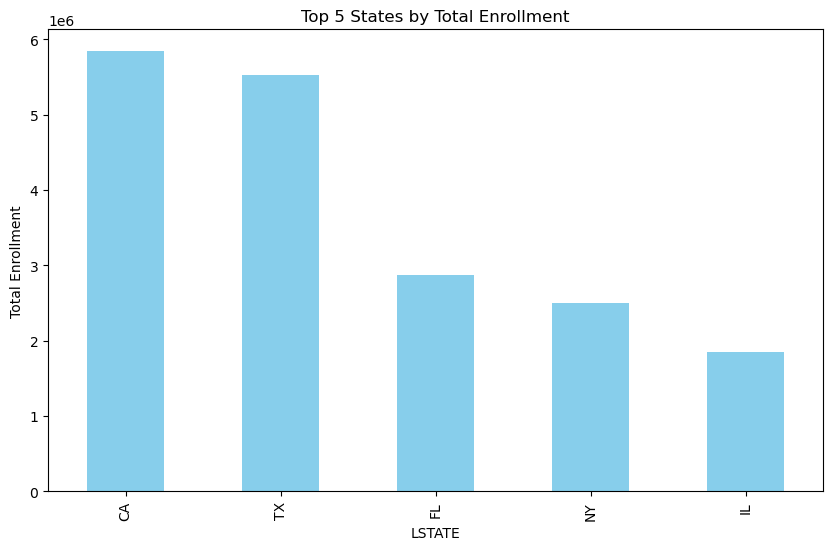

In [48]:
top_states = data.groupby('LSTATE')['TOTAL'].sum().nlargest(5)
plt.figure(figsize=(10,6))
top_states.plot(kind='bar', color='skyblue')
plt.title('Top 5 States by Total Enrollment')
plt.ylabel('Total Enrollment')
plt.show()


## Distribution of Total Student Enrollment

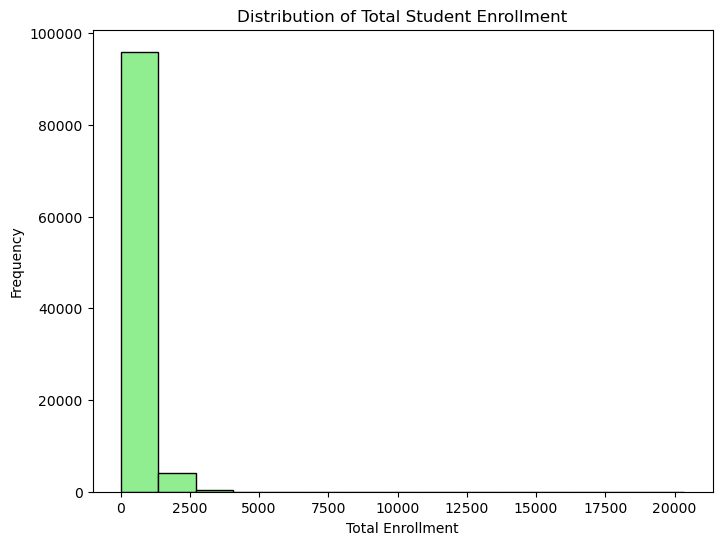

In [51]:
plt.figure(figsize=(8,6))
plt.hist(data['TOTAL'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Distribution of Total Student Enrollment')
plt.xlabel('Total Enrollment')
plt.ylabel('Frequency')
plt.show()


## Student-Teacher Ratio by School Level

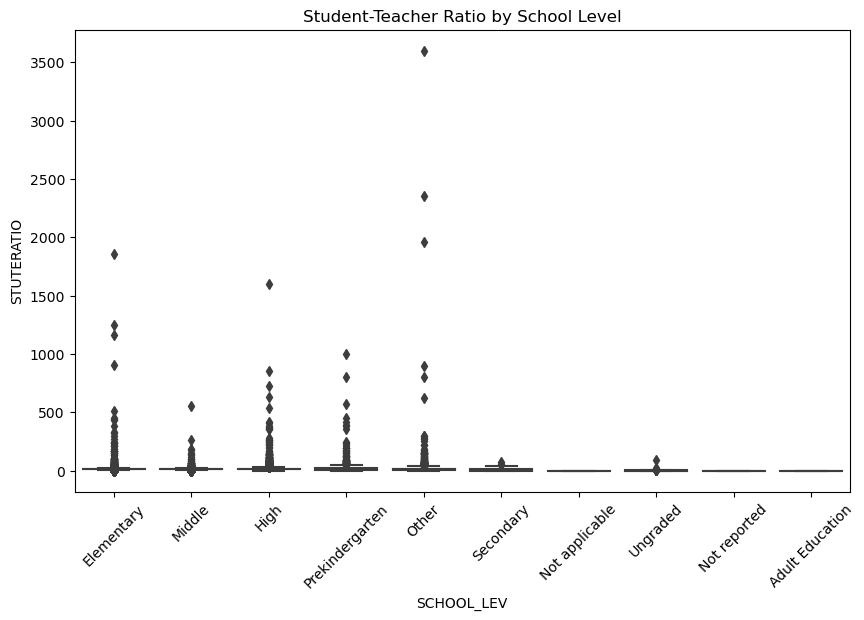

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(x='SCHOOL_LEV', y='STUTERATIO', data=data)
plt.title('Student-Teacher Ratio by School Level')
plt.xticks(rotation=45)
plt.show()


## Total Enrollment vs. Student-Teacher Ratio

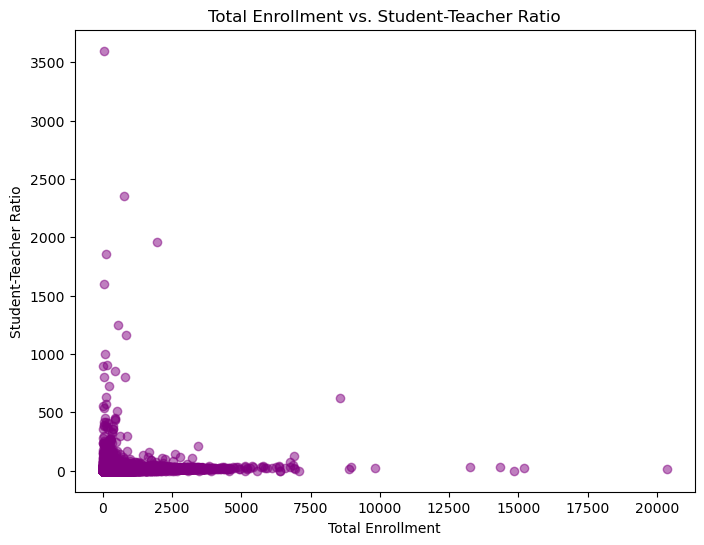

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(data['TOTAL'], data['STUTERATIO'], alpha=0.5, color='purple')
plt.title('Total Enrollment vs. Student-Teacher Ratio')
plt.xlabel('Total Enrollment')
plt.ylabel('Student-Teacher Ratio')
plt.show()


## Distribution of Schools by Locale

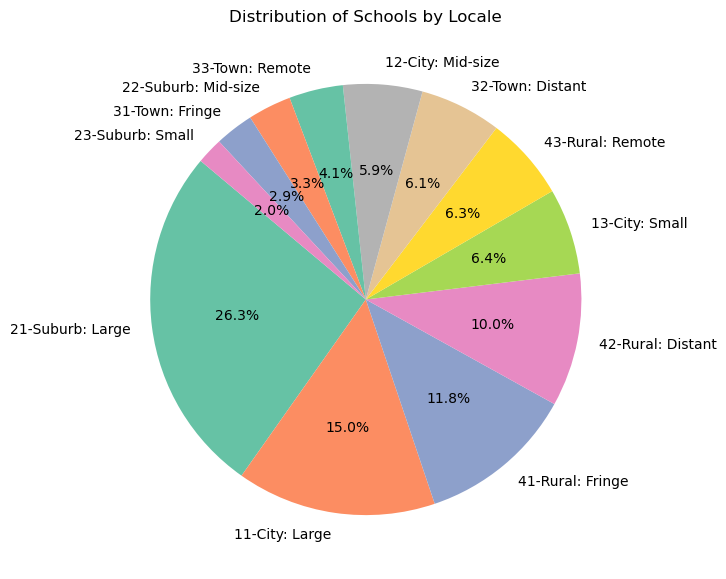

In [54]:
locale_distribution = data['ULOCALE'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(locale_distribution, labels=locale_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Distribution of Schools by Locale')
plt.show()


## Correlation Matrix of Numeric Features

C:\Users\Tanay\AppData\Local\Temp\ipykernel_39076\2349287873.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm', annot=False)


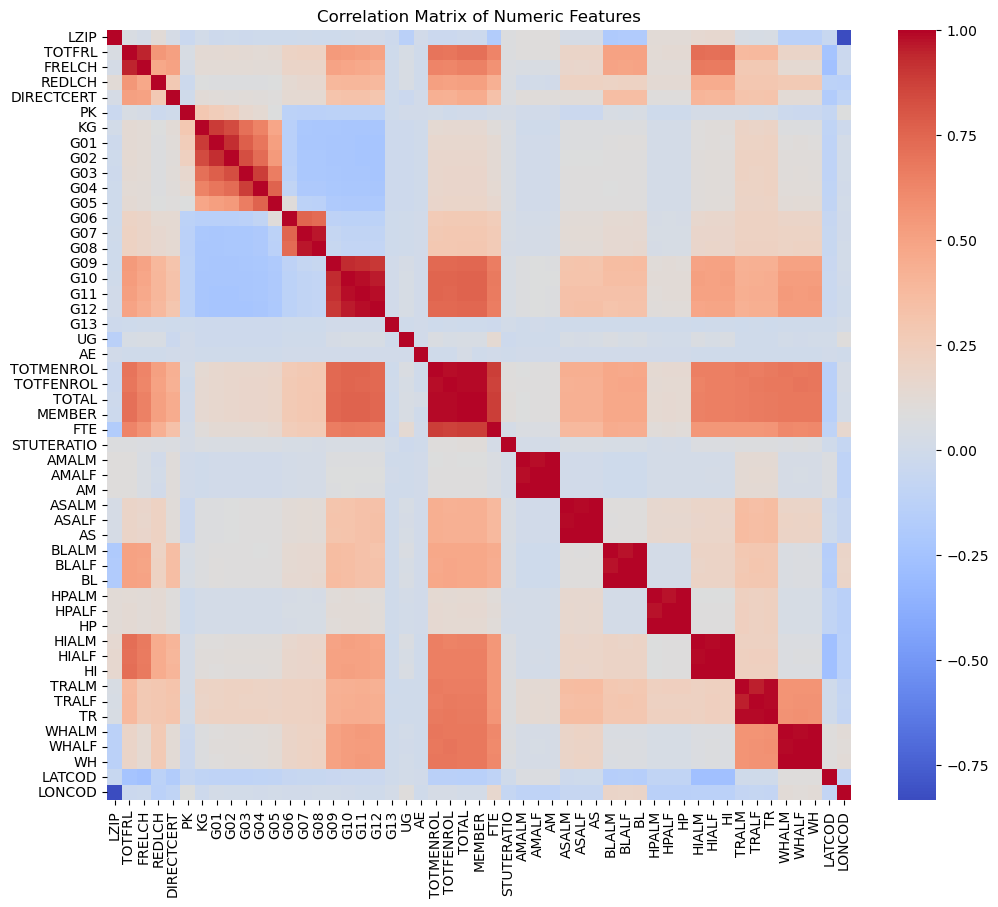

In [55]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


## Distribution of Free/Reduced-Price Lunch Programs

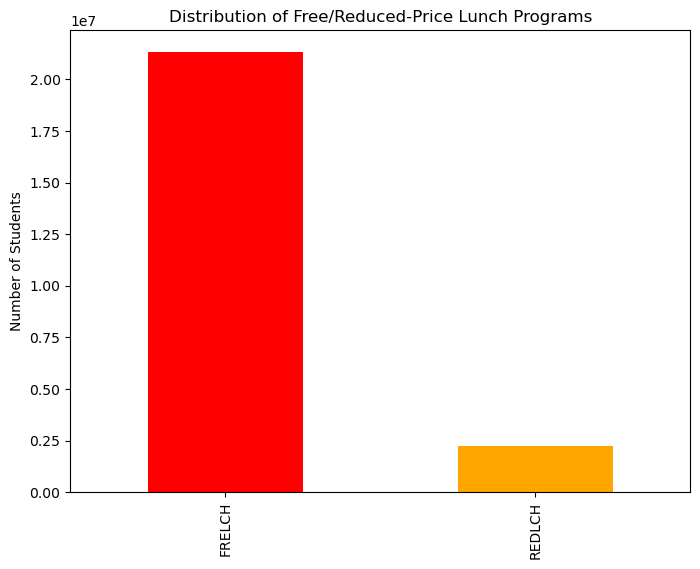

In [58]:
frl_distribution = data[['FRELCH', 'REDLCH']].sum()
plt.figure(figsize=(8,6))
frl_distribution.plot(kind='bar', color=['red', 'orange'])
plt.title('Distribution of Free/Reduced-Price Lunch Programs')
plt.ylabel('Number of Students')
plt.show()


## Student-Teacher Ratio Distribution

C:\Users\Tanay\AppData\Local\Temp\ipykernel_39076\766782790.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['STUTERATIO'], shade=True, color='darkblue')


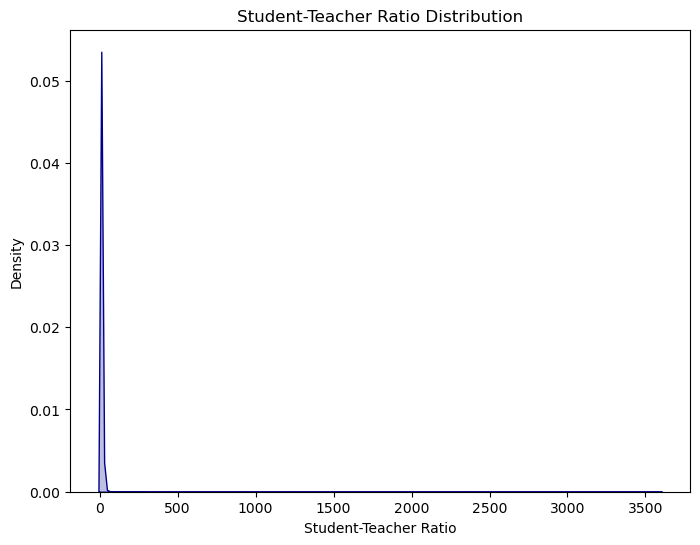

In [59]:
plt.figure(figsize=(8,6))
sns.kdeplot(data['STUTERATIO'], shade=True, color='darkblue')
plt.title('Student-Teacher Ratio Distribution')
plt.xlabel('Student-Teacher Ratio')
plt.show()


## Total Enrollment by School Level

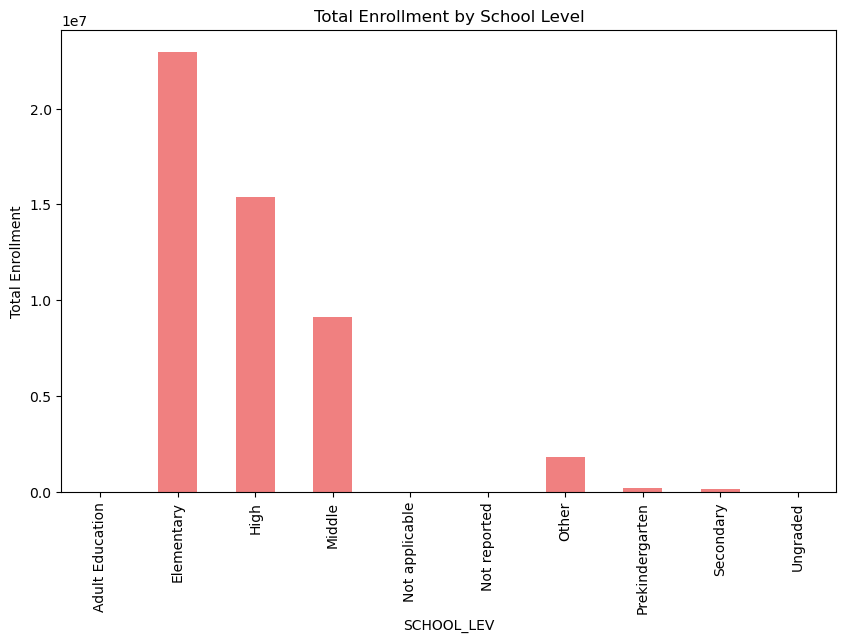

In [60]:
enrollment_by_level = data.groupby('SCHOOL_LEV')['TOTAL'].sum()
plt.figure(figsize=(10,6))
enrollment_by_level.plot(kind='bar', color='lightcoral')
plt.title('Total Enrollment by School Level')
plt.ylabel('Total Enrollment')
plt.show()


## Total Enrollment by State (Top 10 States)

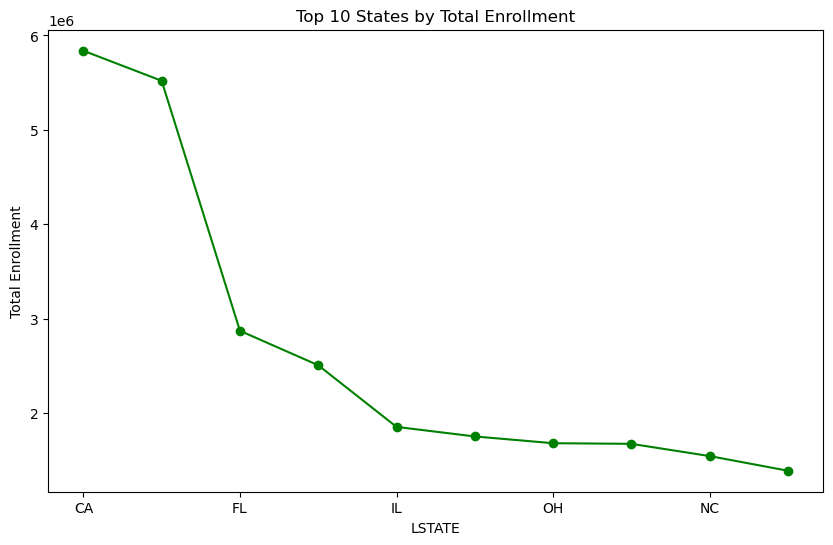

In [61]:
top_10_states = data.groupby('LSTATE')['TOTAL'].sum().nlargest(10)
plt.figure(figsize=(10,6))
top_10_states.plot(kind='line', marker='o', color='green')
plt.title('Top 10 States by Total Enrollment')
plt.ylabel('Total Enrollment')
plt.show()
